## Model 4.3: SEIR in an open population in Python/PyGOM

*Author*: Thomas Finnie @twomagpi

*Date*: 2018-10-03

In [3]:
# housekeeping
import numpy
from pygom import DeterministicOde, TransitionType, SimulateOde, Transition

ImportError: cannot import name 'DeterministicOde'

### Build the model system

In [2]:
# first set up the states
states = ['Susceptible', 
         'Preinfectious', 
         'Infectious', 
         'Immune'
        ]
# now set up the parameters
parameters = ['beta',
              'infectious_rate',
              'rec_rate',
              'total_popn',
              'b_rate',
              'm_rate']

# setup the ODEs
odes = [
    Transition(origin='Susceptible', 
               equation='-beta*Susceptible*Infectious + total_popn*b_rate - Susceptible*m_rate',
               transition_type=TransitionType.ODE),
    Transition(origin='Preinfectious', 
               equation='beta*Susceptible*Infectious - Preinfectious*infectious_rate - Preinfectious*m_rate',
               transition_type=TransitionType.ODE), 
    Transition(origin='Infectious', 
               equation='Preinfectious*infectious_rate - Infectious*rec_rate - Infectious*m_rate',
               transition_type=TransitionType.ODE), 
    Transition(origin='Immune', 
               equation='Infectious*rec_rate - Immune*m_rate',
               transition_type=TransitionType.ODE)
    ]
# now create the system
ode_obj = DeterministicOde(states, 
                           parameters,
                           ode=odes)
ode_obj.print_ode()

⎡ dSusceptible/dt=          -Infectious⋅Susceptible⋅β - Susceptible⋅mᵣₐₜₑ + bᵣ
⎢                                                                             
⎢dPreinfectious/dt=  Infectious⋅Susceptible⋅β - Preinfectious⋅infectiousᵣₐₜₑ -
⎢                                                                             
⎢ dInfectious/dt=        -Infectious⋅mᵣₐₜₑ - Infectious⋅recᵣₐₜₑ + Preinfectiou
⎢                                                                             
⎣   dImmune/dt=                           -Immune⋅mᵣₐₜₑ + Infectious⋅recᵣₐₜₑ  

ₐₜₑ⋅totalₚₒₚₙ       ⎤
                    ⎥
 Preinfectious⋅mᵣₐₜₑ⎥
                    ⎥
s⋅infectiousᵣₐₜₑ    ⎥
                    ⎥
                    ⎦


### Now set up the parameters

In [3]:
## Demography ##
# total population size
total_popn = 100000
# life expectancy in years
life_expectancy_yrs = 70
# per capita mortality rate
m_rate = 1/(life_expectancy_yrs*365)
# per capita birth rate
b_rate = m_rate

## Transmission and Infection parameters ##
# average pre-infectious period
preinfectious_period = 8
# average infectious period
infectious_period = 7
# R0
R0 = 13
# rate at which individuals become infectious
infectious_rate = 1/preinfectious_period
#rate at which individuals recover to become immune
rec_rate = 1/infectious_period
# rate at which two specific individuals come into effective contact per unit time
beta = R0/(total_popn*infectious_period)
prop_immune_0 = 0.0    

## Inital Values ##
#initial number of immune individuals
Immune_0 = total_popn*prop_immune_0
# initial number of infectious individuals
Infectious_0 = 1
# initial number of susceptible individuals
Sus_0 = total_popn-Infectious_0 -Immune_0
# initial number of pre-infectious individuals
Preinfectious_0 = 0

### Solve the model system

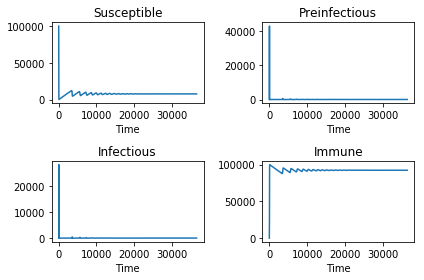

In [8]:
# Create the timeline
t = numpy.linspace(0, 36500, 1001)
# Set the inital values for the states
ode_obj.initial_values = ([Sus_0, 
                           Preinfectious_0,
                           Infectious_0,
                           Immune_0], 
                          t[0])

#set the values for the parameters
ode_obj.parameters = {'beta': beta,
                      'infectious_rate': infectious_rate,
                      'rec_rate': rec_rate,
                      'total_popn': total_popn,
                      'b_rate': b_rate,
                      'm_rate': m_rate
                     }

solution,output = ode_obj.integrate(t[1::], full_output=True)
ode_obj.plot()

In [9]:
# Now for a pretty graph
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Accent4

output_notebook()

Loading BokehJS ...

In [11]:
colors = Accent4

p = figure(title="Measles Example",
          y_axis_type="log"
          )

for i in range(solution.shape[1]):
    p.line(t, 
           solution[:,i], 
           line_color=colors[i],
           legend=states[i],
           line_width=2)

show(p)